In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import random

In [2]:
dataset = pd.read_csv('Data.csv')

**1) Converting the cleaned dataset into dataframe 'df' and analyzing it**

In [3]:
df = pd.DataFrame(data = dataset)

1.a) Finding number of rows, columns and column names

In [4]:
print("Number of rows in dataset is",len(df.index))
print("Number of columns in dataset is",len(df.columns))
print("Column names : ",df.columns)

Number of rows in dataset is 5653053
Number of columns in dataset is 6
Column names :  Index(['user', 'timestamp', 'x', 'y', 'z', 'class'], dtype='object')


1.b) Number of unique users in dataset

In [5]:
print("Number of unique users are :",df['user'].nunique())
print("All unique users :\n",df['user'].unique())

Number of unique users are : 32
All unique users :
 ['a2d80ed662f34d32951eb1c6ed076c313e358b73'
 'a526f3566e9c9024dfa7378eb4291d787a09fd37'
 'a59868c6eb3645eedbb343ce8c336ec6f2ef2324'
 'a92dee88f61123f923dccec01eeecf1a81953b36'
 'ac4c17afeb69b39169eb301ab592696a8f353976'
 'adaaae1a67ea9e43abd60ba945eccda0cb8821e0'
 'b138d165100ef60bc793cac143742eb5aea4d6ba'
 'b45157069942d01310c3e7b74034166717bb25f9'
 'b7b165e5637b5a0226068d907748f4bbfc61a320'
 'c453226e3616ae821cdcb38f38481c2a20f2482f'
 'c5702d34b238fe68683f818e82cd3a3cd8a16366'
 'ca7950f223a8037b897d0547075dc138f9e43b20'
 'cace4ec0999436917986b4fa6e9317262c897bc2'
 'cbde60baea002b694ecf2a3ff2d95be16b00efe1'
 'ce39f5d0705695fcd70a04ba6d84ac6beecd6f9c'
 'd429974540bfd38c3367fe9f0c8682775ff4fa18'
 'd7a1230d94f91a32cc079809748e52e8a4a6a22f'
 'd7dd12d83c81574137f858034b99f4cc83ab0718'
 'd8c047eaaee204b7b5cd71e2d67308b87b038ed3'
 'dc0bdce306ec3b624fe0e6ecd1ffbd82cb970120'
 'dd82e3df4bebc74ed6b67877be79e29f401c16a3'
 'dde95e125d89843f7032ba

In [6]:
#Name of mode of transport
df['class'].unique()

array(['bus', 'walk', 'car', 'bike', 'train', 'e-bike'], dtype=object)

In [7]:
uniq_class = df['class'].unique()
print(uniq_class)

['bus' 'walk' 'car' 'bike' 'train' 'e-bike']


**2) Determining number of unique sequences**

In [8]:
#Converting 'timestamp' column from string to DateTime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
#Function to get number of unique sequences per user per class
def number_of_uniq_seq_per_user_per_class(df):
    all_uniq_class = df['class'].unique()       #list of all unique classes for a particular user
    grpby_class = df.groupby('class')
    #dataframe to store number of unique sequences for every class of a particular user
    df_user_stats = pd.DataFrame(columns = ['user','class','number of unique sequences']) 
    for i in range(len(all_uniq_class)):
        df_by_class = grpby_class.get_group(all_uniq_class[i])   #grouping by class
        df_by_class = df_by_class.sort_values("timestamp")       #sorting the records by their time
        first_row = df_by_class.first_valid_index()
        
        #calculating time difference between successive records
        df_by_class['timedelta'] = (df_by_class['timestamp'] - df_by_class['timestamp'].shift(periods=1,fill_value=
                                                    df_by_class['timestamp'].loc[first_row]))/np.timedelta64(1,'s')
        #counting all time differences greater than 10 seconds which provide us the number of records
        diff_greater_than_10 = df_by_class[df_by_class['timedelta'] > 10].count().loc['user']

        #appending the records for this class
        stat_for_this_group = {'user' : df_by_class['user'].loc[first_row], 'class' : all_uniq_class[i],
                                             'number of unique sequences' : diff_greater_than_10}
        df_user_stats = df_user_stats.append(stat_for_this_group, ignore_index = True)

    return df_user_stats

In [10]:
starttime = timeit.default_timer()
all_uniq_user = df['user'].unique()       #list of all unique users
grpby_user = df.groupby('user')           #grouping the dataset by unique users

#table to store number of unique sequences per user per class
uniq_seq_stats = pd.DataFrame(columns = ['user','class','number of unique sequences'])  
for i in range(len(all_uniq_user)):
    df_user_stats = number_of_uniq_seq_per_user_per_class(grpby_user.get_group(all_uniq_user[i]))
    uniq_seq_stats = uniq_seq_stats.append(df_user_stats,ignore_index = True)

time_to_find_num_of_uniq_seq = timeit.default_timer() - starttime

In [11]:
print(uniq_seq_stats,"\n")
print("Time taken to find number of unique sequences", time_to_find_num_of_uniq_seq,"secs")

                                        user class number of unique sequences
0   a2d80ed662f34d32951eb1c6ed076c313e358b73   bus                         12
1   a526f3566e9c9024dfa7378eb4291d787a09fd37  walk                         18
2   a526f3566e9c9024dfa7378eb4291d787a09fd37   car                         12
3   a59868c6eb3645eedbb343ce8c336ec6f2ef2324   car                         65
4   a59868c6eb3645eedbb343ce8c336ec6f2ef2324  walk                          7
..                                       ...   ...                        ...
65  f5edd999397145a2ec1b244226fc83f99631760c   bus                         15
66  f7ae1ce141c26db40ea8b090fb568a0c965310aa   car                          1
67  faae5be800be2dfa897eea0bd2e5988cd53c4ec0   car                          9
68  faae5be800be2dfa897eea0bd2e5988cd53c4ec0  bike                        134
69  faae5be800be2dfa897eea0bd2e5988cd53c4ec0  walk                         34

[70 rows x 3 columns] 

Time taken to find number of unique seq

In [12]:
#finding out all unique dates in the dataset and printing them
uniq_date = df["timestamp"].map(pd.Timestamp.date).unique()
print(uniq_date)

[datetime.date(2018, 6, 4) datetime.date(2018, 4, 10)
 datetime.date(2018, 4, 11) datetime.date(2018, 4, 13)
 datetime.date(2018, 4, 14) datetime.date(2018, 4, 19)
 datetime.date(2018, 4, 12) datetime.date(2018, 4, 16)
 datetime.date(2018, 4, 18) datetime.date(2018, 6, 3)
 datetime.date(2018, 6, 7) datetime.date(2018, 10, 11)
 datetime.date(2018, 10, 13) datetime.date(2018, 10, 14)
 datetime.date(2018, 10, 15) datetime.date(2018, 10, 16)
 datetime.date(2018, 10, 18) datetime.date(2018, 10, 19)
 datetime.date(2018, 6, 6) datetime.date(2018, 4, 17)
 datetime.date(2019, 5, 27) datetime.date(2019, 5, 28)
 datetime.date(2019, 5, 29) datetime.date(2019, 5, 30)
 datetime.date(2019, 9, 10) datetime.date(2019, 9, 12)
 datetime.date(2019, 9, 13) datetime.date(2019, 9, 9)
 datetime.date(2019, 9, 11) datetime.date(2018, 10, 12)
 datetime.date(2018, 10, 17) datetime.date(2018, 10, 9)
 datetime.date(2018, 6, 5) datetime.date(2018, 10, 10)]


In [13]:
print(uniq_date)

[datetime.date(2018, 6, 4) datetime.date(2018, 4, 10)
 datetime.date(2018, 4, 11) datetime.date(2018, 4, 13)
 datetime.date(2018, 4, 14) datetime.date(2018, 4, 19)
 datetime.date(2018, 4, 12) datetime.date(2018, 4, 16)
 datetime.date(2018, 4, 18) datetime.date(2018, 6, 3)
 datetime.date(2018, 6, 7) datetime.date(2018, 10, 11)
 datetime.date(2018, 10, 13) datetime.date(2018, 10, 14)
 datetime.date(2018, 10, 15) datetime.date(2018, 10, 16)
 datetime.date(2018, 10, 18) datetime.date(2018, 10, 19)
 datetime.date(2018, 6, 6) datetime.date(2018, 4, 17)
 datetime.date(2019, 5, 27) datetime.date(2019, 5, 28)
 datetime.date(2019, 5, 29) datetime.date(2019, 5, 30)
 datetime.date(2019, 9, 10) datetime.date(2019, 9, 12)
 datetime.date(2019, 9, 13) datetime.date(2019, 9, 9)
 datetime.date(2019, 9, 11) datetime.date(2018, 10, 12)
 datetime.date(2018, 10, 17) datetime.date(2018, 10, 9)
 datetime.date(2018, 6, 5) datetime.date(2018, 10, 10)]


In [14]:
#number of unique dates
print(len(uniq_date))

34


In [15]:
#converting unique dates from string to datetime data type
uniq_date = pd.to_datetime(uniq_date)
print(uniq_date.dtype)

datetime64[ns]




**3) Creating time window partition of 5 secs**

In [16]:
#creating records for particular user and particular class by dividing the records into 5 sec time window
def create_dataset_by_time_window(df):
    
    #minimum time of records
    mintime = df['tmdel'].min();
    
    #maximum time of records
    maxtime = df['tmdel'].max();
    
    #counting number of interval of 5 secs between maximum and minimum time
    number_of_fives = int((maxtime - mintime) / 5)
    range_array = np.arange(number_of_fives+1)
    fives_array = np.ones(number_of_fives+1) * 5
    delta_time = np.multiply(range_array,fives_array)
    
    #dataframe to store time window condensed records
    df_by_timewindow = pd.DataFrame(columns = ['xmin','ymin','zmin','xmax','ymax','zmax','xavg','yavg','zavg','xstd','ystd','zstd','count','class'])
    
    for i in range(len(delta_time)-1):
        
        start_time = delta_time[i]
        end_time = delta_time[i+1]
        
        #getting all records b/w in the 5 sec interval i.e. between start time and end time
        records_bw_starttime_endtime = df[(df['tmdel'] >= start_time) & (df['tmdel'] < end_time)]     
        
        #getting the properties and statistics of above dataframe record
        prop = records_bw_starttime_endtime.describe()
        
        #if the number of record between the time interval is 0, then continue
        if(prop['x'].loc['count'] == 0):
            continue
        
        #getting first valid record of this interval
        firstidx = records_bw_starttime_endtime.first_valid_index()
        
        #getting the class of this record
        label = records_bw_starttime_endtime['class'].loc[firstidx]
        
        #adding the statistics and properties of this interval into the dataframe
        new_timewindow_record = {'xmin' : prop['x'].loc['min'], 'ymin' : prop['y'].loc['min'], 'zmin' : prop['z'].loc['min'],
          'xmax' : prop['x'].loc['max'], 'ymax' : prop['y'].loc['max'], 'zmax' : prop['z'].loc['max'],
            'xavg' : prop['x'].loc['mean'], 'yavg' : prop['y'].loc['mean'], 'zavg' : prop['z'].loc['mean'],
           'xstd' : prop['x'].loc['std'], 'ystd' : prop['y'].loc['std'], 'zstd' : prop['z'].loc['std'],
          'count' : prop['x'].loc['count'], 'class' : label}
        df_by_timewindow = df_by_timewindow.append(new_timewindow_record, ignore_index = True)
    
    return df_by_timewindow

In [17]:
#creating dataset for particular user
def createdatasetforuser(indiv_user):
    uniq_class = indiv_user["class"].unique()       #number of unique class for each user
    grpclass = indiv_user.groupby("class")          #grouping the dataset for individual user by class
    dataset = pd.DataFrame(columns = ['xmin','ymin','zmin','xmax','ymax','zmax','xavg','yavg','zavg','xstd','ystd','zstd','count','class'])
    for i in range(len(uniq_class)):
        df_by_class = grpclass.get_group(uniq_class[i])        #dataset for unique user and unique class
        df_by_class = df_by_class.sort_values("timestamp")     #sorting the dataset by time
        first_row = df_by_class.first_valid_index()            #getting first valid index in the dataset
        
        #calculating time difference between successive records
        df_by_class['timedelta'] = (df_by_class['timestamp'] - df_by_class['timestamp'].shift(periods=1,fill_value=
                                                    df_by_class['timestamp'].loc[first_row]))/np.timedelta64(1,'s')
        
        #getting all records where time difference between successive records surpasses 5 seconds
        diff_greater_than_5 = df_by_class[df_by_class['timedelta'] > 5]
        
        #filtering out dates of all those records
        filter_dates = df_by_class[(df_by_class['timedelta'].isin(diff_greater_than_5['timedelta']))]['timestamp']
        
        #getting the start date of the dataset
        start_date = df_by_class['timestamp'].loc[first_row]
        
        #converting the filtered dates to datetime datatype
        filter_dates = filter_dates.to_numpy(dtype="datetime64[ns]")
        filter_dates = pd.to_datetime(filter_dates)
        
        #getting the dataset for each user and each class sorted according to dates
        dataset_for_each_user_each_class = pd.DataFrame(columns = ['xmin','ymin','zmin','xmax','ymax','zmax','xavg','yavg','zavg','xstd','ystd','zstd','count','class'])
        for i in range(len(filter_dates)):
            end_date = filter_dates[i]
            
            #if difference between two sequences is less than 5 seconds, then counting it as 1 sequence
            if((end_date-start_date)/np.timedelta64(1,'s') < 5):
                start_date = end_date
                continue
                
            #getting the records between two dates or time
            df_seq_by_date = df_by_class[(df_by_class['timestamp'] >= start_date) & (df_by_class['timestamp'] < end_date)]
            
            #minimum time of the sequence
            mintime = df_seq_by_date['timestamp'].min()
            
            #subtracting the minimum time from all records in the sequence and making it a column
            df_seq_by_date['tmdel'] = (df_seq_by_date['timestamp'] - mintime) / np.timedelta64(1,'s')
            
            #dividing the sequence in time windows
            df_seq_by_date_by_time_window = create_dataset_by_time_window(df_seq_by_date)
            
            #appending the time divided sequences into one
            dataset_for_each_user_each_class = dataset_for_each_user_each_class.append(df_seq_by_date_by_time_window,ignore_index = True)
            
            #iterating for the next time window
            start_date = end_date
        
        #final dataset divided containing time window stats for each user
        dataset = dataset.append(dataset_for_each_user_each_class,ignore_index=True)

    return dataset

In [18]:
starttime = timeit.default_timer()
#creating final dataset for the use in creating balanced dataset
dataset = pd.DataFrame(columns = ['xmin','ymin','zmin','xmax','ymax','zmax','xavg','yavg','zavg','xstd','ystd','zstd','count','class'])

for i in range(len(all_uniq_user)):
    
    #getting all records of each individual user
    indiv_user = grpby_user.get_group(all_uniq_user[i])
    
    #appending the records condensed by time window into final dataset
    dataset = dataset.append(createdatasetforuser(indiv_user), ignore_index = True)
print("Time taken in partitioning the dataset into time window of 5 s and getting all the properties is :", timeit.default_timer() - starttime,'secs')
    

C:\Users\Rahul Gauriyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Time taken in partitioning the dataset into time window of 5 s and getting all the properties is : 1043.4097669999999 secs


In [19]:
#Number of sequences of each transportation mode
print('Number of sequences of each transportation mode is as follows:\n')
print(dataset['class'].value_counts())

Number of sequences of each transportation mode is as follows:

car       16094
bus        8672
walk       4353
bike       1858
train       537
e-bike       53
Name: class, dtype: int64


**4) Box and Whisker plot for each feature of each transportation mode**

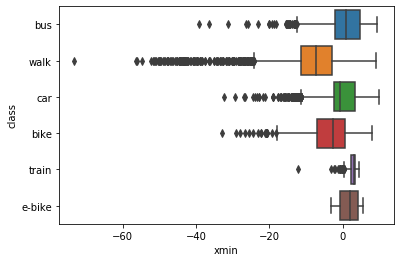

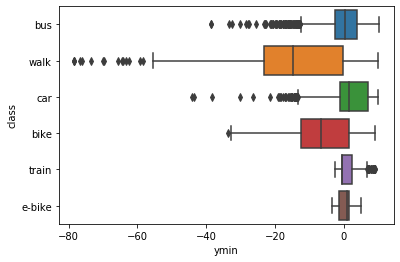

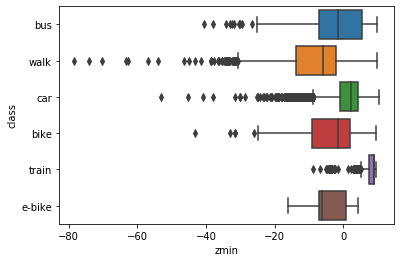

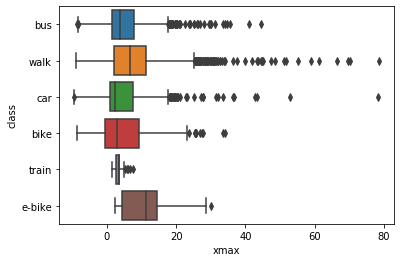

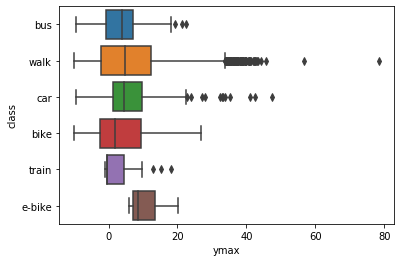

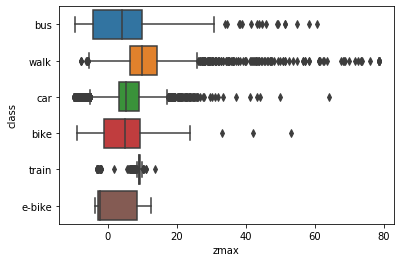

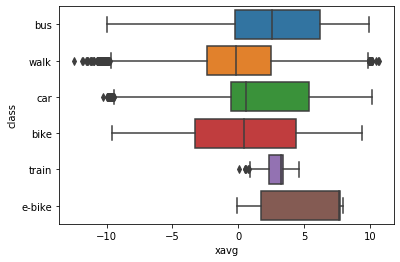

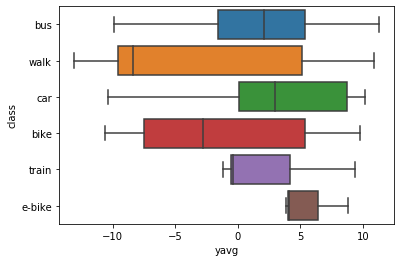

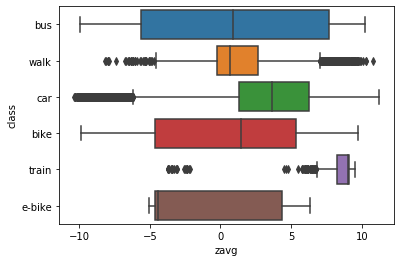

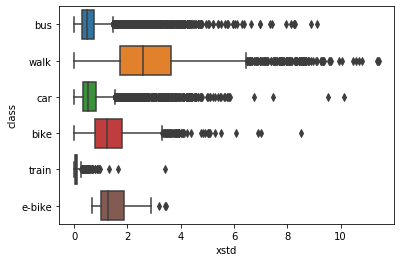

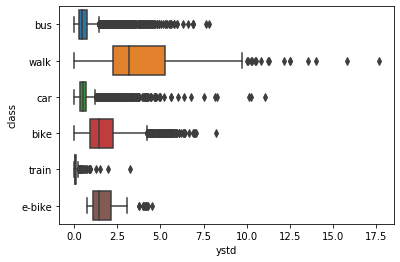

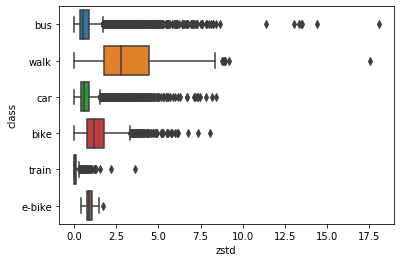

In [20]:
import seaborn as sns
column_names = dataset.columns
for col in range(len(column_names)-2):
    ax = sns.boxplot(x=column_names[col], y= 'class', data= dataset)
    plt.show()

In [21]:
print("Interpretation of the visualization plot :")
print("The acceleration in x direction is highly scattered in walking class")
print("The range of values for train is localized wrt other modes")
print("Values of car are highly correlated with values of bus and bike")
print("The average acceleration of ebike in z direction is uniformly distributed")

Interpretation of the visualization plot :
The acceleration in x direction is highly scattered in walking class
The range of values for train is localized wrt other modes
Values of car are highly correlated with values of bus and bike
The average acceleration of ebike in z direction is uniformly distributed


**5) Creating Balanced dataset**

In [22]:
#Taking only those sequences in which number of records is greater than the median number of records for that transportation mode
def balanced_dataset(dataset):
    min_datapoints = dataset['class'].value_counts().min()
    xcar = dataset[(dataset['class'] == 'car') & (dataset['count'] > dataset['count'].median())].sample(n = min_datapoints)
    xbus = dataset[(dataset['class'] == 'bus') & (dataset['count'] > dataset['count'].median())].sample(n = min_datapoints)
    xwalk = dataset[(dataset['class'] == 'walk') & (dataset['count'] > dataset['count'].median())].sample(n = min_datapoints)
    xbike = dataset[(dataset['class'] == 'bike') & (dataset['count'] > dataset['count'].median())].sample(n = min_datapoints)
    xtrain = dataset[(dataset['class'] == 'train') & (dataset['count'] > dataset['count'].median())].sample(n = min_datapoints)
    xebike = dataset[dataset['class'] == 'e-bike']
    classes = dataset['class'].unique()
    bal_dataset = pd.DataFrame(columns = ['xmin','ymin','zmin','xmax','ymax','zmax','xavg','yavg','zavg','xstd','ystd','zstd','count','class'])
    bal_dataset = bal_dataset.append([xcar, xbus, xwalk, xbike, xtrain, xebike], ignore_index = True)

    return bal_dataset

In [23]:
#Balanced dataset and number of data points in each transportation mode
bal_dataset = balanced_dataset(dataset)
print('Number of data points in each transportation mode\n')
print(bal_dataset['class'].value_counts())

Number of data points in each transportation mode

car       53
walk      53
e-bike    53
bus       53
train     53
bike      53
Name: class, dtype: int64


In [24]:
#Partitioning the balanced dataset into input and output, i.e X and y respectively
X = bal_dataset.iloc[:,0:12].values
y = bal_dataset.iloc[:, -1].values

In [25]:
#Since y is string ,encoding it
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

**6) Splitting into train, validation and test dataset**

In [26]:
#splitting the dataset into training, validation and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25)
print("Number of points in training set",len(X_train))
print("Number of points in validation set",len(X_val))
print("Number of points in test set",len(X_test))

Number of points in training set 190
Number of points in validation set 64
Number of points in test set 64


In [27]:
#Scaling the training input
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_val = sc_X.fit_transform(X_val)
X_test = sc_X.transform(X_test)

In [28]:
#creating a dictionary of transportation modes
dict_of_class = {0 : "bike", 1: "bus", 2 : "car", 3 : "e-bike", 4 : "train", 5 : "walk"}
class_names = ["bike", "bus", "car", "e-bike", "train", "walk"]

**7) Training different models**

**Using SVM**

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
classifier_svm = SVC(kernel='rbf', C = 1.0, gamma = 0.5, random_state=0).fit(X_train, y_train)
y_pred = classifier_svm.predict(X_val)
confusion_matrix_svm = confusion_matrix(y_val, y_pred)
accuracy_svm = classifier_svm.score(X_val, y_val) * 100 
print("Accuracy of the model on validation set is",accuracy_svm,'%')
print("Confusion matrix\n", confusion_matrix_svm)
print(classification_report(y_val, y_pred, target_names= class_names))

Accuracy of the model on validation set is 67.1875 %
Confusion matrix
 [[ 5  0  1  0  0  5]
 [ 2  5  6  0  0  1]
 [ 3  2  8  0  0  1]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

        bike       0.50      0.45      0.48        11
         bus       0.71      0.36      0.48        14
         car       0.53      0.57      0.55        14
      e-bike       1.00      1.00      1.00         7
       train       1.00      1.00      1.00        11
        walk       0.50      1.00      0.67         7

    accuracy                           0.67        64
   macro avg       0.71      0.73      0.70        64
weighted avg       0.69      0.67      0.66        64



**Using Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
classifier_logist = LogisticRegression(random_state=0, solver = 'lbfgs',multi_class = 'multinomial').fit(X_train, y_train)
y_pred = classifier_logist.predict(X_val)
confusion_matrix_logist = confusion_matrix(y_val, y_pred)
accuracy_logist = classifier_logist.score(X_val, y_val) * 100 
print("Accuracy of the model on validation set is",accuracy_logist,'%')
print("Confusion matrix\n", confusion_matrix_logist)
print(classification_report(y_val, y_pred, target_names= class_names))

Accuracy of the model on validation set is 57.8125 %
Confusion matrix
 [[ 3  1  0  2  1  4]
 [ 1  4  2  4  1  2]
 [ 3  4  5  1  1  0]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  7]]
              precision    recall  f1-score   support

        bike       0.43      0.27      0.33        11
         bus       0.44      0.29      0.35        14
         car       0.71      0.36      0.48        14
      e-bike       0.50      1.00      0.67         7
       train       0.79      1.00      0.88        11
        walk       0.54      1.00      0.70         7

    accuracy                           0.58        64
   macro avg       0.57      0.65      0.57        64
weighted avg       0.58      0.58      0.54        64



**Using Neural Networks**

In [31]:
from sklearn.neural_network import MLPClassifier
classifier_mlp = MLPClassifier(hidden_layer_sizes=(16,12,6),max_iter = 2000).fit(X_train,y_train)
y_pred = classifier_mlp.predict(X_val)
confusion_matrix_mlp = confusion_matrix(y_val, y_pred)
accuracy_mlp = classifier_mlp.score(X_val, y_val) * 100 
print("Accuracy of the model on validation set is",accuracy_mlp,'%')
print("Confusion matrix\n", confusion_matrix_mlp)
print(classification_report(y_val, y_pred, target_names= class_names))

Accuracy of the model on validation set is 70.3125 %
Confusion matrix
 [[ 6  1  0  1  0  3]
 [ 1  5  7  1  0  0]
 [ 1  2 10  0  0  1]
 [ 0  0  0  7  0  0]
 [ 0  0  0  0 11  0]
 [ 1  0  0  0  0  6]]
              precision    recall  f1-score   support

        bike       0.67      0.55      0.60        11
         bus       0.62      0.36      0.45        14
         car       0.59      0.71      0.65        14
      e-bike       0.78      1.00      0.88         7
       train       1.00      1.00      1.00        11
        walk       0.60      0.86      0.71         7

    accuracy                           0.70        64
   macro avg       0.71      0.75      0.71        64
weighted avg       0.70      0.70      0.69        64



**Calculating accuracy of test dataset**

In [32]:
print("Calculating accuracy on test dataset\n\n")
#SVM model
y_pred = classifier_svm.predict(X_test)
accuracy_svm = classifier_svm.score(X_test, y_test) * 100 
print("Overall accuracy by SVM is",accuracy_svm,'%')
print("Confusion matrix\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names= class_names))

#Logistic Regression model
y_pred = classifier_logist.predict(X_test)
accuracy_logist = classifier_logist.score(X_test, y_test) * 100 
print("Overall accuracy by Logistic Regression is",accuracy_logist,'%')
print("Confusion matrix\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names= class_names))

#Neural Networks
y_pred = classifier_mlp.predict(X_test)
accuracy_mlp = classifier_mlp.score(X_test, y_test) * 100 
print("Overall accuracy by Neural Networks is",accuracy_mlp,'%')
print("Confusion matrix\n", confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred, target_names= class_names))


accuracy_dict = {accuracy_svm : 'SVM' , accuracy_logist : 'Logistics Regression', accuracy_mlp : 'Neural Networks'}
print("The best model which predicted highest accuracy is", accuracy_dict[max(accuracy_svm,accuracy_logist,accuracy_mlp)])

Calculating accuracy on test dataset


Overall accuracy by SVM is 67.1875 %
Confusion matrix
 [[2 2 1 0 0 6]
 [1 0 3 3 0 7]
 [3 2 5 1 0 3]
 [1 0 1 0 1 4]
 [0 2 2 3 2 2]
 [1 0 1 0 4 1]]
              precision    recall  f1-score   support

        bike       0.25      0.18      0.21        11
         bus       0.00      0.00      0.00        14
         car       0.38      0.36      0.37        14
      e-bike       0.00      0.00      0.00         7
       train       0.29      0.18      0.22        11
        walk       0.04      0.14      0.07         7

    accuracy                           0.16        64
   macro avg       0.16      0.14      0.14        64
weighted avg       0.18      0.16      0.16        64

Overall accuracy by Logistic Regression is 62.5 %
Confusion matrix
 [[2 1 2 4 0 2]
 [3 0 2 6 0 3]
 [3 1 6 2 1 1]
 [1 0 0 0 2 4]
 [0 1 1 6 2 1]
 [1 1 0 0 4 1]]
              precision    recall  f1-score   support

        bike       0.20      0.18      0.19        11
    

**EXTRA, APART FROM QUESTIONS GIVEN, USING KERAS ON DIFFERENT SAMPLES**

In [33]:
#encoding categorical data which is in class column
bal_dataset_ann = bal_dataset
labels = pd.get_dummies(bal_dataset_ann['class'])
print(labels.head())

   bike  bus  car  e-bike  train  walk
0     0    0    1       0      0     0
1     0    0    1       0      0     0
2     0    0    1       0      0     0
3     0    0    1       0      0     0
4     0    0    1       0      0     0


In [34]:
bal_dataset_ann.drop('class',axis='columns')

,xmin,ymin,zmin,xmax,ymax,zmax,xavg,yavg,zavg,xstd,ystd,zstd,count
0,-3.21,8.75,-3.63,-0.49,11.120000,0.30,-1.668122,9.617310,-1.763299,0.494666,0.421074,1.066728,197.0
1,-2.67,6.87,1.75,3.65,10.630000,6.83,-0.155493,8.994527,4.096620,0.708597,0.535706,0.952333,497.0
2,-2.46,-8.77,-10.46,1.47,-4.070000,-5.77,-0.737884,-5.797566,-8.142487,0.807138,0.863769,0.759705,189.0
3,0.18,8.30,-5.05,4.07,9.800000,-1.71,1.662759,9.162118,-3.345862,0.699452,0.197644,0.654764,203.0
4,4.26,0.25,-11.04,9.47,2.800000,-5.19,6.158239,1.397045,-7.466875,0.802493,0.378181,0.869601,176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,-0.93,-2.45,2.78,4.04,16.059999,10.74,1.629034,6.641080,5.866989,1.026294,4.508564,1.400365,176.0
314,-2.02,-1.21,1.68,3.38,17.469999,8.61,0.551870,8.230569,4.699837,1.223721,3.043609,1.470790,123.0
315,-2.30,2.19,0.72,2.24,15.520000,8.81,0.124324,8.821004,4.340270,0.695778,1.655303,0.946910,259.0
316,-3.17,3.28,0.17,3.88,20.290001,6.93,-0.065938,8.770375,4.185313,0.916110,2.158930,0.972835,160.0


In [35]:
#adding encoding for each class
bal_dataset_ann['bike'] = labels['bike'].to_list()
bal_dataset_ann['bus'] = labels['bus'].to_list()
bal_dataset_ann['car'] = labels['car'].to_list()
bal_dataset_ann['ebike'] = labels['e-bike'].to_list()
bal_dataset_ann['train'] = labels['train'].to_list()
bal_dataset_ann['walk'] = labels['walk'].to_list()

In [36]:
print(bal_dataset_ann.head())

   xmin  ymin   zmin  xmax   ymax  zmax      xavg      yavg      zavg  \
0 -3.21  8.75  -3.63 -0.49  11.12  0.30 -1.668122  9.617310 -1.763299   
1 -2.67  6.87   1.75  3.65  10.63  6.83 -0.155493  8.994527  4.096620   
2 -2.46 -8.77 -10.46  1.47  -4.07 -5.77 -0.737884 -5.797566 -8.142487   
3  0.18  8.30  -5.05  4.07   9.80 -1.71  1.662759  9.162118 -3.345862   
4  4.26  0.25 -11.04  9.47   2.80 -5.19  6.158239  1.397045 -7.466875   

       xstd      ystd      zstd  count class  bike  bus  car  ebike  train  \
0  0.494666  0.421074  1.066728  197.0   car     0    0    1      0      0   
1  0.708597  0.535706  0.952333  497.0   car     0    0    1      0      0   
2  0.807138  0.863769  0.759705  189.0   car     0    0    1      0      0   
3  0.699452  0.197644  0.654764  203.0   car     0    0    1      0      0   
4  0.802493  0.378181  0.869601  176.0   car     0    0    1      0      0   

   walk  
0     0  
1     0  
2     0  
3     0  
4     0  


In [37]:
X = bal_dataset_ann.iloc[:, 0:12].values
y = bal_dataset_ann.iloc[:, 14:20].values
print(X[1])
print(y[1])

[-2.67000008  6.86999989  1.75        3.6500001  10.63000011  6.82999992
 -0.15549296  8.99452718  4.09661972  0.70859684  0.53570593  0.95233279]
[0 0 1 0 0 0]


In [38]:
from sklearn.model_selection import train_test_split
X_train_ann, X_val_ann, y_train_ann, y_val_ann = train_test_split(X, y, test_size=0.2)
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_train_ann, y_train_ann, test_size=0.25)

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_ann = sc_X.fit_transform(X_train_ann)
X_val_ann = sc_X.fit_transform(X_val_ann)
X_test_ann = sc_X.transform(X_test_ann)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

model_ann = Sequential()
model_ann.add(Dense(16,activation='relu',input_dim = 12))
model_ann.add(Dense(12,activation='relu'))
model_ann.add(Dense(8,activation='relu'))
model_ann.add(Dense(6,activation='softmax'))
#adam = Adam()
sgd = SGD(learning_rate=0.005, momentum=0.9, nesterov=False)

In [41]:
model_ann.compile(loss = 'categorical_crossentropy',optimizer = sgd, metrics = ['accuracy'])

In [42]:
model_ann.fit(X_train_ann,y_train_ann,epochs = 200,batch_size = 20)

Epoch 1/200
10/10 [==============================] - 0s 3ms/step - loss: 1.7936 - accuracy: 0.1211
Epoch 2/200
10/10 [==============================] - 0s 2ms/step - loss: 1.7281 - accuracy: 0.2474
Epoch 3/200
10/10 [==============================] - 0s 3ms/step - loss: 1.6536 - accuracy: 0.4000
Epoch 4/200
10/10 [==============================] - 0s 2ms/step - loss: 1.5875 - accuracy: 0.4158
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 1.5210 - accuracy: 0.4579
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 1.4651 - accuracy: 0.5053
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 1.4141 - accuracy: 0.5158
Epoch 8/200
10/10 [==============================] - 0s 2ms/step - loss: 1.3729 - accuracy: 0.5211
Epoch 9/200
10/10 [==============================] - 0s 2ms/step - loss: 1.3336 - accuracy: 0.5211
Epoch 10/200
10/10 [==============================] - 0s 2ms/step - loss: 1.2938 - accuracy: 0.5211
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8474
Epoch 83/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8789
Epoch 84/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8684
Epoch 85/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.8684
Epoch 86/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8842
Epoch 87/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8789
Epoch 88/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3021 - accuracy: 0.8737
Epoch 89/200
10/10 [==============================] - 0s 2ms/step - loss: 0.3037 - accuracy: 0.8842
Epoch 90/200
10/10 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8895
Epoch 91/200
10/10 [==============================] - 0s 2ms/step - loss: 0.2975 - accuracy: 0.8895
Epoch 92/200


10/10 [==============================] - 0s 2ms/step - loss: 0.1457 - accuracy: 0.9474
Epoch 164/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1342 - accuracy: 0.9632
Epoch 165/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9526
Epoch 166/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9632
Epoch 167/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1253 - accuracy: 0.9579
Epoch 168/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1284 - accuracy: 0.9632
Epoch 169/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1269 - accuracy: 0.9632
Epoch 170/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.9737
Epoch 171/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9789
Epoch 172/200
10/10 [==============================] - 0s 2ms/step - loss: 0.1213 - accuracy: 0.9737
Epoc

In [43]:
score_ann = model_ann.evaluate(X_val_ann,y_val_ann)
print('Evaluation of validation set\n')
print(score_ann[1] * 100 ,"%")

2/2 [==============================] - 0s 1ms/step - loss: 1.1478 - accuracy: 0.7500
Evaluation of validation set

75.0 %


In [44]:
score_ann = model_ann.evaluate(X_test_ann,y_test_ann)
print("Test accuracy by Neural Networks using Keras is",score_ann[1] * 100 ,"%")

2/2 [==============================] - 0s 2ms/step - loss: 1.5813 - accuracy: 0.7344
Test accuracy by Neural Networks using Keras is 73.4375 %
